# K-Means Algorithms

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
data = pd.read_csv("../data/example_cluster.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_1   1000 non-null   float64
 1   var_2   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
data.head()

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520


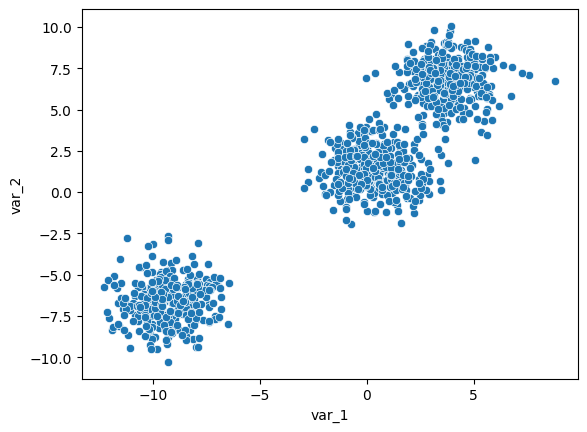

In [8]:
sns.scatterplot(x="var_1", y="var_2", data=data) # 산점도
plt.show()
# 몇개의 그륩으로 나눌 수 있을지 확인 -> 3개

In [29]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3, random_state=100)

In [12]:
km.fit(data)

KMeans(n_clusters=3, random_state=100)

In [14]:
pred = km.predict(data)

In [15]:
data['pred'] = pred

In [16]:
data

,var_1,var_2,pred
0,3.264413,6.929164,2
1,0.220814,2.251631,1
2,-8.786197,-8.333582,0
3,-0.008547,2.630791,1
4,4.912903,6.888520,2
...,...,...,...
995,4.678232,7.704404,2
996,5.250715,6.930948,2
997,-11.818752,-5.609853,0
998,0.613725,3.809334,1


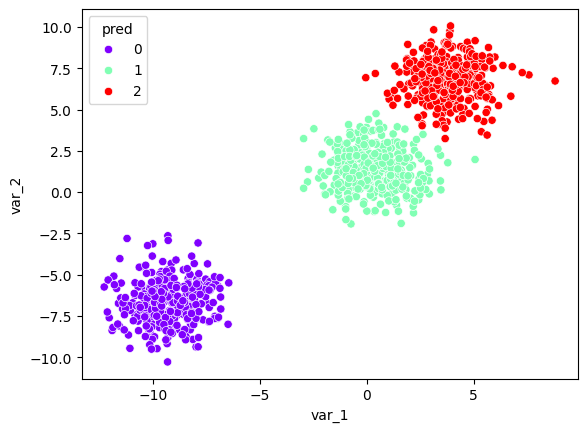

In [19]:
sns.scatterplot(data=data, x="var_1", y="var_2", hue="pred", palette='rainbow')
plt.show()

In [20]:
km.inertia_ # 중심과 끝점의 거리

3090.0332370766614

In [21]:
inertia_list = list()
for k in range(2, 20):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia_list.append(km.inertia_)
print(inertia_list)

[9908.551424778394, 3090.033237076661, 2717.1810299269505, 2413.6362786341742, 2066.0242929639276, 1833.667437730569, 1739.1075102818181, 1382.018650615847, 1299.9967446880137, 1225.9670296441886, 1138.186585087779, 1030.4901405786397, 976.0162403738552, 900.1529850396984, 849.858783331196, 852.6377087593468, 777.1779621035478, 723.2332908277924]


<Axes: >

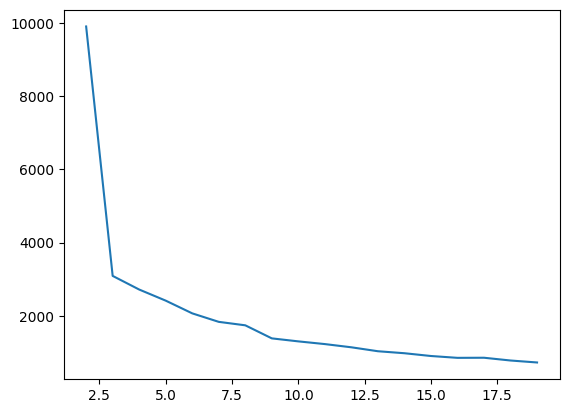

In [22]:
sns.lineplot(x=range(2,20), y=inertia_list) # 급격하기 꺾이는 부분이 최적의 값 !
# 엘보우 기법 !

In [6]:
data = pd.read_csv("../data/customer.csv")

In [8]:
data.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [14]:
data['cc_num'].value_counts()

cc_num
4642255475285942       4386
4512828414983801773    4384
6534628260579800       4383
180048185037117        4382
3553629419254918       4381
                       ... 
4110266553600176127     738
3592325941359225        738
4767265376804500        736
630412733309            736
38859492057661          735
Name: count, Length: 100, dtype: int64

In [9]:
data.nunique()

cc_num        100
category       11
amt         28204
dtype: int64

In [17]:
data = data.groupby(['cc_num', 'category']).sum().reset_index()

In [18]:
data.head()

,cc_num,category,amt
0,60495593109,entertainment,3169.74
1,60495593109,food_dining,4043.46
2,60495593109,gas_transport,5076.36
3,60495593109,grocery,7576.58
4,60495593109,health_fitness,1631.22


In [20]:
data = pd.pivot_table(data, index='cc_num', columns='category', values='amt')

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [26]:
data = pd.DataFrame(scaler.fit_transform(data), columns= data.columns, index=data.index)

In [27]:
data

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
cc_num,,,,,,,,,,,
60495593109,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


In [30]:
inertia_list = list()
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia_list.append(km.inertia_)

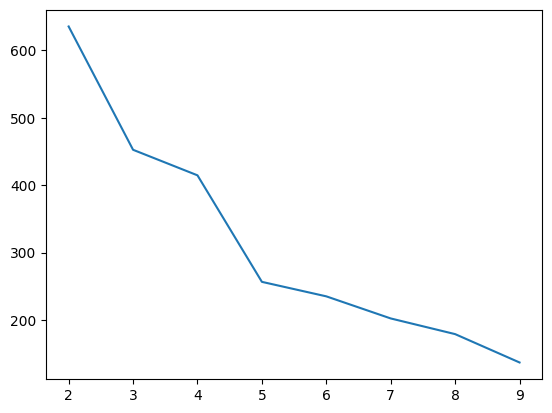

In [31]:
sns.lineplot(x=range(2, 10), y=inertia_list)
plt.show()

In [ ]:
# 실루엣 스코어(다른 클러스터도 고려) -> 높을수록 좋음

In [33]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score_list = list()
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(data)
    pred = km.predict(data)
    silhouette_score_list.append(silhouette_score(data, pred))

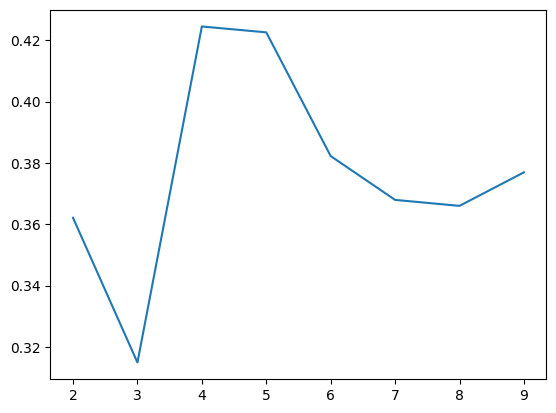

In [42]:
sns.lineplot(x=range(2, 10), y=silhouette_score_list)
plt.show()

In [43]:
km = KMeans(n_clusters=4)
km.fit(data)
pred = km.predict(data)

In [44]:
pred

array([0, 3, 2, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 1, 0, 0, 3, 0, 3, 1,
       3, 0, 3, 0, 1, 2, 2, 0, 3, 2, 3, 3, 2, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       3, 1, 3, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 0, 1,
       2, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 3,
       0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3], dtype=int32)

In [45]:
data['label'] = pred

In [46]:
data

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel,label
cc_num,,,,,,,,,,,,
60495593109,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
571465035400,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,2
630412733309,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
4599735407877245080,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
4666314527820883145,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0


In [48]:
data.groupby('label').mean()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
label,,,,,,,,,,,
0,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604
1,2.636017,2.102489,-0.339554,2.553883,1.526188,1.118452,1.527483,2.410239,2.042583,2.581577,-0.269260
2,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
3,0.215463,0.277615,0.885459,0.226599,0.440311,0.381802,0.709355,0.429554,0.516388,0.125844,-0.263144


In [49]:
data.groupby('label').count()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
label,,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45,45
1,7,7,7,7,7,7,7,7,7,7,7
2,8,8,8,8,8,8,8,8,8,8,8
3,40,40,40,40,40,40,40,40,40,40,40
